<a href="https://colab.research.google.com/github/gagoorisamchon/aalto/blob/main/aifinance_1_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

필요한 모듈을 불러온다.

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

데이터를 검색할 기간을 설정한다.

In [2]:
start = '2018-01-01'
end = '2023-12-31'

Yahoo finance에서 필요한 데이터를 불러온다.

In [3]:
bitcoin_data = yf.download('BTC-USD', start=start, end=end, progress=False)['Adj Close']
samsung_data = yf.download("005935.KS", start=start, end=end, progress=False)['Adj Close']

데이터를 확인한다.

In [5]:
WINDOW = 20
df=pd.DataFrame()
df['bitcoin']=bitcoin_data
df['samsung']=samsung_data

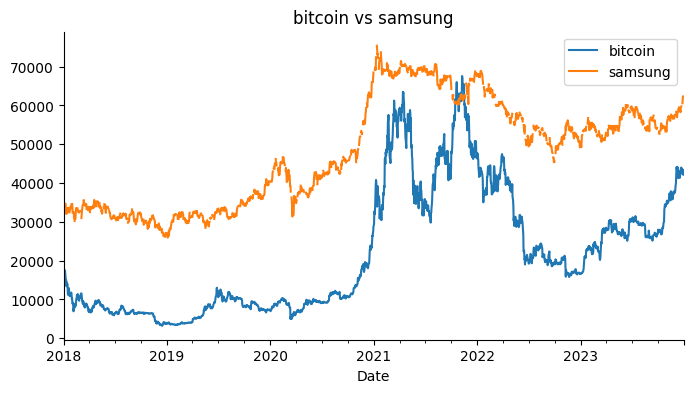

In [23]:
# @title bitcoin

from matplotlib import pyplot as plt
df[['bitcoin', 'samsung']].plot(kind='line', figsize=(8, 4), title='bitcoin vs samsung')
plt.gca().spines[['top', 'right']].set_visible(False)

In [6]:
# prompt: df DataFrame 사용: samsung

df[['samsung']].head()


,samsung
Date,
2018-01-01,NaN
2018-01-02,34449.023438
2018-01-03,34334.035156
2018-01-04,34334.035156
2018-01-05,34711.867188


WINDOW에서 지정한 간격으로 수익률을 계산한 다음, NaN 부분의 행은 모두 삭제한다.

In [7]:
w_ret = df.pct_change(WINDOW).dropna()
w_ret.head()

,bitcoin,samsung
Date,,
2018-01-22,-0.270369,-0.056748
2018-01-23,-0.285021,-0.038278
2018-01-24,-0.271796,-0.037321
2018-01-25,-0.354003,-0.030762
2018-01-26,-0.362618,-0.020350


corr 메서드를 호출해서 피어슨 상관지수를 구한다.

In [8]:
corr_matrix = w_ret.corr()

결과로 모든 쌍에 대해 계산된 행렬이 만들어 진다.
이 행렬을 한번 출력해 보자.

In [9]:
print(corr_matrix)

          bitcoin   samsung
bitcoin  1.000000  0.275746
samsung  0.275746  1.000000
